# Regularization and Feature Selection Lecture:

## Today's learning goals:

After today, you'll be able to:

- explain what the problems of over/underfitting are and how they relate to the bias/variance trade-off
- explain how regularization addresses the over/underfitting problem
- explain the differences between regularization methods and when it is appropriate to use them
- explain the factors to consider when deciding which features to include
- apply feature selection and regularization to prevent overfitting in a model

## **---> [Slides for this lecture here](https://docs.google.com/presentation/d/1ge1VtFkkIDWWX920__m8nhi-7eK17FwOJW2ay6YdRPo/edit?usp=sharing) <---**

---

### Review:  Under/Overfitting & Bias/Variance 

#### Underfitting

- **Underfitting occurs when a statistical model or machine learning algorithm cannot capture the underlying trend of the data.**  
- Intuitively, underfitting occurs when the model or the algorithm does not fit the data well enough.  
- Specifically, underfitting occurs if the model or algorithm shows low variance but high bias.  

Underfitting is often a result of an excessively simple model. Underfitting is often not discussed as it is easy to detect given a good performance metric. Nevertheless, it does provide a good contrast to the problem of overfitting.

#### Overfitting

- **Overfitting occurs when a statistical model or machine learning algorithm captures the noise of the data.**  
- Intuitively, overfitting occurs when the model or the algorithm fits the data too well.  
- Specifically, overfitting occurs if the model or algorithm shows low bias but high variance.  

Overfitting is often a result of an excessively complicated model. If features are not filtered and explored up front, some of them can be more destructive than helpful, repeat information that already expressed by other features, and/or add high noise to the dataset.

#### A visual example:

<img src='https://codingstartups.com/wp-content/uploads/2017/08/overfit.png' width='800'/>

- Both overfitting and underfitting lead to poor predictions on new data sets.

---

#### The Bias Variance Trade-off

**Bias:**

- The bias error is an error from erroneous assumptions in the learning algorithm. 
- High bias can cause an algorithm to miss the relevant relationship between features and target outputs (underfitting).

    - Suppose your machine learning model is performing very badly on a set of data because it is not generalizing to all your data points. This phenomenon occurs when the model is underfit and your model can be interpreted as having **high bias**.

**Variance:**

- The variance is an error from sensitivity to small fluctuations in the training set. 
- High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

    - Suppose your machine learning model tries to account for all or mostly all points in a dataset successfully. If it then performs poorly when run on other test data sets, it is said to have high variance. **High variance** occurs when the model is overfit.

The goal of any supervised machine learning algorithm is to achieve low bias and low variance. In turn, the algorithm should achieve good prediction performance.

- Increasing the bias will decrease the variance.
- Increasing the variance will decrease the bias.

If our model is too simple and has very few parameters then it may have high bias and low variance. On the other hand if our model has large number of parameters then it’s going to have high variance and low bias. So we need to find the right/good balance without overfitting and underfitting the data.

<img src='https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543418451/tradeoff_sevifm.png' width='600' />

Most of the time, we'll only have to deal with the overfitting. One of the most common techniques for managing the problem of overfitting is called **regularization**. 

As the model complexity increases, which in the case of linear regression can be thought of as the number of predictors, the model's variance increases and the bias decreases. The unbiased OLS would place us on the right-hand side of the picture, which is far from optimal. That's why we regularize: to lower the variance at the cost of some bias, thus moving left on the plot, towards the optimum.

---

# Ridge and Lasso Regression



We'll get some practice with regularization in a bit. 

First, let's get a better understanding behind what happens when we apply some regularization. 

## Regularizing a Model


>***“Everything should be made simple as possible, but not simpler"***
    
    – Albert Einstein

Even though Lasso and Ridge are only used in regression, regularizing a model is a common procedure in the process of building machine learning models. It is an effective procedure for tackling the problem of overfitting. 

- Generally speaking, applying regularization technique introduces some **bias** to the model, but reduces the **variance**, and therefore results in better performance with future testing data. 

#### What is regularization in the context of regression? 

We can recall: 
- As the complexity of model increases, the model overfits and performance on the testing set decreases. 

Regularization techniques *shrink* the regression coefficients such that the coefficients are not affecting the outcomes as much as they originally would have. In other words, using regularization applies a *penalty* term to the coefficients of your regression model. Let's see how exactly Ridge regression and Lasso regression work to reduce variances in regression models and result in better fit. 

### Revisiting the Cost Function

Before we dive into regularization, let's (re)visit a concept called **Cost Function**. A cost function is a measure of how good or bad the model is at estimating the relationship of our $X$ and $y$ variables. Usually, it is expressed in the difference between actual values and predicted values. For simple linear regression, the cost function is represented as:
<center> $$ \text{cost_function}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i -  bx + b_0)^2$$


For linear regression with multiple predictors, the cost function is expressed as so: 
- $k$ stands for number of predictors at $j$th term

$$ \text{cost_function}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij}) + b)^2$$

A regularized machine learning model has a cost function that contains a penalty term, which should be minimized as well.

## Ridge Regression (L2 Norm)

The ridge regression applies a penalizing parameter $\lambda$ *slope*$^2$, such that a small bias will be introduced to the entire model depending on the value of $\lambda$, which is called a ***hyperparameter***. We'll discuss hyperparameters in upcoming lessons, but for now let's look at the cost function equation:

$$ \text{cost_function_ridge}= \sum_{i=1}^n(y_i - \hat{y})^2 + \lambda \sum_{j=1}^p m_j^2$$
$$ = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij} + b))^2 + \lambda \sum_{j=1}^p m_j^2$$

- the *slope*$^2$ portion of the equation adds a penalty to the traditional least squares method
- the $\lambda$ portion of the equation is determines how severe the penalty is


The L2 term is equal to the square of the magnitude for all of the coefficients from original regression, except for the intercept term. In this case, if $\lambda$ is zero then the equation is the basic OLS, but if it is greater than zero we add a constraint to the coefficients. 


Ridge regression improves the fit of the original regression line by introducing some bias - aka: changing the slope and intercept of the original line. Recall the way we interpret a regression model $y = mx + b$: with every unit increase in $x$, the outcome $y$ increase by $m$ unit. Therefore, the bigger the coefficient $m$ is, the more the outcome is subjected to changes in predictor $x$. 

Ridge regression works by reducing the magnitude of the coefficient $m$ and therefore reducing the effect the predictors have on the outcome. Shrinking the coefficients leads to a lower variance and in turn a lower error value. A super important fact we need to notice about ridge regression is that it enforces the coefficients to be lower, but it does not enforce them to be zero. That is, it will not get rid of irrelevant features but rather minimize their impact on the trained model. Therefore, Ridge regression decreases the complexity of a model but does not reduce the number of variables, rather it just shrinks their effect.

## Lasso Regression (L1 Norm)
Lasso regression is very similar to Ridge regression. The single difference is that the penalty term is not squared. Instead, the penalty term is the absolute values of the coefficients multiplied by lambda, expressed as:

$$ \text{cost_function_lasso}= \sum_{i=1}^n(y_i - \hat{y})^2 + \lambda \sum_{j=1}^p \mid m_j \mid$$ 
$$ = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij} + b))^2 + \lambda \sum_{j=1}^p \mid m_j \mid$$

The biggest difference between Ridge and Lasso performance is that Lasso simultaneously performs variable selection: some coefficients are shrunk to 0, rendering them nonexistent from the original regression model. Therefore, Lasso regression performs very well when you have higher dimensional dataset where some predictors are useless; whereas Ridge works best when all the predictors are needed.

## Questions to ponder:

* When should you use a regularized model instead of a normal model?

* How do regularized models differ from normal linear regression?

* How does a Ridge model differ from a Lasso Model?

<img src="https://media.giphy.com/media/AWeYSE0qgpk76/giphy.gif" width= "400" />

---

## A short exercise:

Take a moment to think of any possible features that the sales of a store might be dependent on. For each feature, hypothesize about why and how that feature would influence the sales of various products. For example, I might expect the sales of products to depend on the location of the store, because the local residents in each area would have different lifestyle. The amount of bread a store will sell in a small store in Montana would probably be a fraction of similar store in New York City.

This could include things like location of your shop, availability of the products, size of the shop, offers on the product, advertising done by a product, and placement within the store.

From all of the features we thought of, let's suppose 10 of those possible features are categorical, each having 10+ categories per feature. When we transform those categorical features into dummies, we'd have a lot more features than when we started! Without any domain knowledge, how will we know which features are good predictors vs. those that aren't?

---

With that thought in mind, we'll take a look at [The Big Mart Sales dataset](https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data). In this data, we have product wise sales for multiple outlets of a chain.

### Import ze libraries... then fire ze missiles! 

<img src='https://i.ytimg.com/vi/kCpjgl2baLs/hqdefault.jpg' width=400 />

In [1]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression, RFECV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv('bigmart_data_Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In this dataset we can see some of the characteristics of items, the item's outlet, and the number of times that particular item sold. Let’s try to predict sales using these features.

### Implementing L1 & L2 regularization in code:

In this code along, we'll perform linear, ridge, and lasso regressions. Then we'll compare the results.

In [3]:
# df.info()

In [4]:
# Change type to object for categorical variable

df.Outlet_Establishment_Year = df.Outlet_Establishment_Year.astype(object)

In [5]:
# We saw in df.info() that two features had NaNs
# Imputing missing values:

df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

df['Outlet_Size'].fillna('Small', inplace=True)

In [6]:
# Creating dummy variables from categorical

mylist = list(df.select_dtypes(include=['object']).columns)
dummies = pd.get_dummies(df[mylist], prefix=mylist, drop_first=True)

df.drop(mylist, axis=1, inplace=True)
X = pd.concat([df,dummies], axis=1)
X.drop(columns=['Item_Outlet_Sales'], inplace=True)

y = df.Item_Outlet_Sales

In [7]:
# X.head()

In [8]:
# X.columns

In [9]:
# Train, test, split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=39)

In [10]:
# Instantiate and fit linear regression model

lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
# Instantiate and fit Ridge regression model
# Note: in scikit learn the regularization parameter is denoted by alpha (and not lambda)

ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [12]:
# Instantiate and fit Lasso regression model
# Note: in scikit learn the regularization parameter is denoted by alpha (and not lambda)

lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
# Make Linear regression predictions and calculate RMSE
y_pred_lreg = lreg.predict(X_test)
lreg_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lreg))

# Make Ridge regression predictions and calculate RMSE
y_pred_ridge = ridge.predict(X_test)
ridge_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))

# Make Lasso regression predictions and calculate RMSE
y_pred_lasso = lasso.predict(X_test)
lasso_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))

In [14]:
print("Linear Regression RMSE is: {}".format(lreg_rmse))
print() # print a condensed new line

print("Ridge Regression  RMSE is: {}".format(ridge_rmse))
print() # print a condensed new line

print("Lasso Regression  RMSE is: {}".format(lasso_rmse))

Linear Regression RMSE is: 1302.6277312861903

Ridge Regression  RMSE is: 1216.7467611665852

Lasso Regression  RMSE is: 1120.192959285349


Pretty cool stuff! As we can see above, both regularized models performed better than basic linear regression, with Lasso out performing Ridge in this situation.

In [15]:
columns =  X.columns

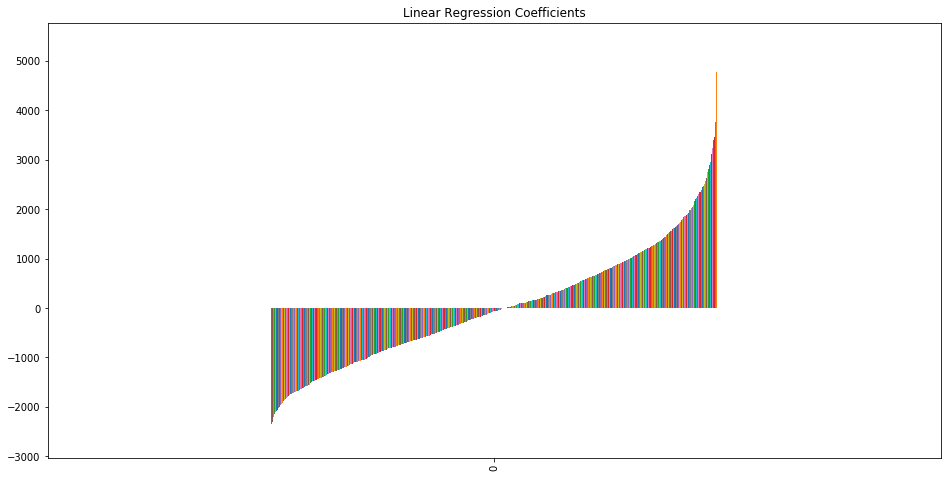

In [16]:
lreg_coef_ = pd.DataFrame(data=lreg.coef_ ).T
lreg_coef_.columns = columns

lreg_coef = lreg_coef_.T.sort_values(by=0).T
lreg_coef.plot(kind='bar', title='Linear Regression Coefficients',
               legend=False, figsize=(16,8));

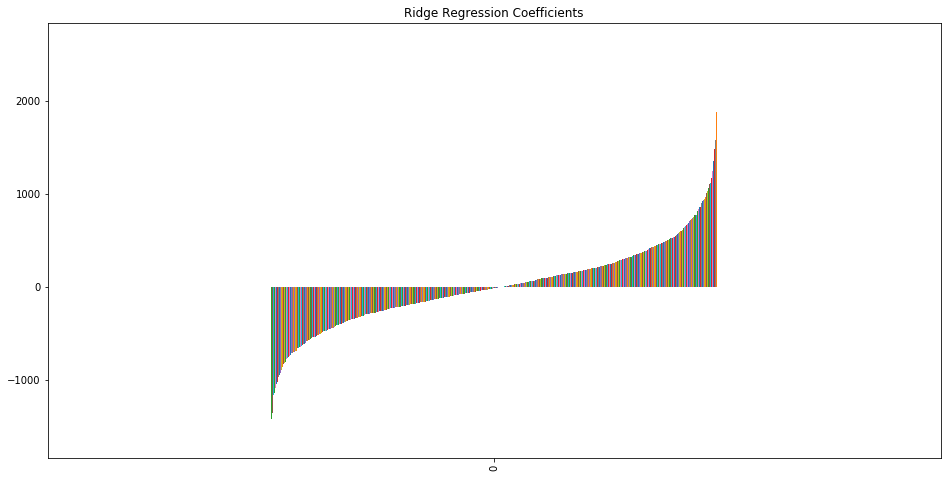

In [17]:
ridge_coef_ = pd.DataFrame(data=ridge.coef_ ).T
ridge_coef_.columns = columns

ridge_coef = ridge_coef_.T.sort_values(by=0).T
ridge_coef.plot(kind='bar', title='Ridge Regression Coefficients',
               legend=False, figsize=(16,8));

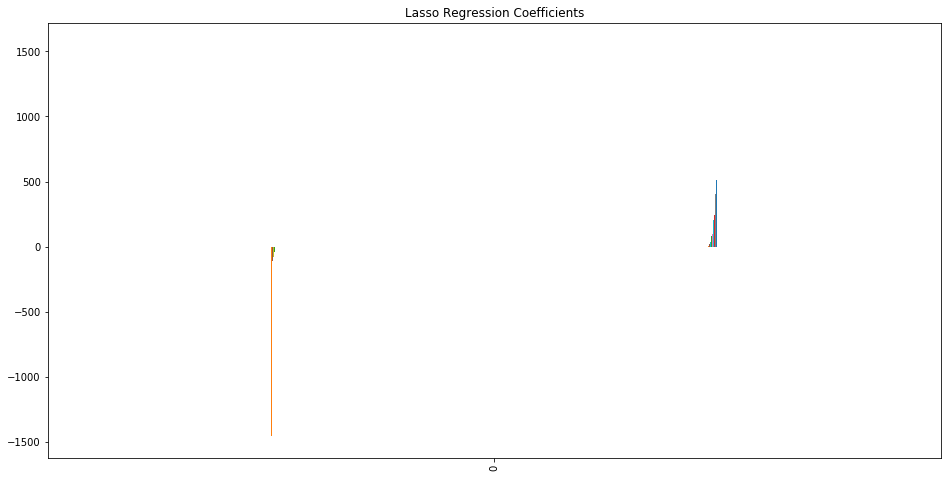

In [18]:
lasso_coef_ = pd.DataFrame(data=lasso.coef_ ).T
lasso_coef_.columns = columns

lasso_coef = lasso_coef_.T.sort_values(by=0).T
lasso_coef.plot(kind='bar', title='Lasso Regression Coefficients',
               legend=False, figsize=(16,8));

As we can see in the plots above, the Ridge and Lasso models have diminished the coefficients. If you're having a hard time visually seeing the difference between Ridge and regular Linear Regression, be sure to check out the y-axis!

#### Let's take a look at the first eight coefficients for each model:

In [19]:
# The first eight linear regression coefficients 

lreg.coef_[:8]

array([    1.83578942,  -483.14617796,    -1.34983266,   378.91853684,
         799.20387636, -1251.43404855,   583.32717542,  1158.77333212])

In [20]:
# We can see here that Ridge has diminished some of the coefficients

ridge.coef_[:8]

array([ 1.38172517e+00, -4.08217849e+02,  1.55353704e+01, -1.39193109e+02,
       -8.37878558e+01, -1.49380599e+03, -3.12888219e+02,  5.95512230e+02])

In [21]:
# We can see here that Lasso has acted accordingly and pushed some coefficients to zero

lasso.coef_[:8]

array([  0.23986334, -69.67361159,  15.42843802,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ])

#### Let's check out the Lasso coefficients that have not been pushed to zero:

In [67]:
series = pd.Series(list(lasso_coef_.T[0].values)) 
  
# Finding non zero coefficients by calling .nonzero() method 
result = series.nonzero() 
  
# display the coefficient indexes
# print(result) 
  
# retrieving values using iloc method and naming the column
lasso_coef_nonzero = lasso_coef_.T.iloc[result]
lasso_coef_nonzero.columns = ['LASSO_nonzero_coeffs']
  
# display 
lasso_coef_nonzero.sort_values(by=['LASSO_nonzero_coeffs'])

,LASSO_nonzero_coeffs
Outlet_Establishment_Year_1998,-1468.528242
Outlet_Identifier_OUT019,-1457.209974
Item_Identifier_NCH43,-306.914663
Item_Identifier_FDP28,-222.548895
Item_Identifier_NCB31,-202.017058
Item_Identifier_NCI30,-113.056495
Outlet_Identifier_OUT045,-90.132994
Item_Identifier_FDS27,-87.875586
Item_Identifier_FDV04,-81.041772
Item_Identifier_FDU12,-69.866234


---

## Calculating AIC and BIC 
AIC and BIC are information criteria for evaluating how good of a model is by giving a measurement of parsimony and goodness of fit. Though AIC and BIC are both Maximum Likelihood estimate driven and penalize free parameters in an effort to combat overfitting, they do so in ways that result in significantly different behavior. 

- AIC is defined as: $2k - 2log(L)$
- BIC is defined as: $klog(n) - 2log(L)$  

where:
- k = model degrees of freedom
- n = number of observations
- L = Likelihood

The best model in the group compared is the one that minimizes these scores, in both cases. Clearly, AIC does not depend directly on sample size. Moreover, generally speaking, AIC presents the danger that it might overfit, whereas BIC presents the danger that it might underfit, simply in virtue of how they penalize free parameters.

AIC tries to select the model that most adequately describes an unknown, high dimensional reality. This means that reality is never in the set of candidate models that are being considered. On the contrary, BIC tries to find the TRUE model among the set of candidates.

**The main takeaway is that when comparing models, the model with the lowest AIC/BIC should be selected.**

## Uses of the AIC and BIC

- Performing feature selection: comparing models with only a few variables and more variables, computing the AIC/BIC and select the features that generated the lowest AIC or BIC

- Similarly, selecting or not selecting interactions/polynomial features depending on whether or not the AIC/BIC decreases when adding them in

- Computing the AIC and BIC for several values of the regularization parameter in Ridge/Lasso models and selecting the best regularization parameter

In [23]:
def aic(y_true, y_pred, k):
    resid = y_true - y_pred
    SSE = (resid**2).sum()
    AIC = 2 * k - 2 * np.log(SSE)
    
    return AIC

In [24]:
X.shape[1]

1604

In [25]:
aic(y_test, y_pred_lreg, X.shape[1])

3164.428803880301

In [26]:
aic(y_test, y_pred_ridge, X.shape[1])

3164.701615273215

In [27]:
aic(y_test, y_pred_lasso, X.shape[1])

3165.032334282461

## Important Lasso/Ridge Takeaways:

- **When to use Ridge vs. Lasso**

> Ridge regression works best when all the predictors are needed; whereas Lasso regression performs very well when you have higher dimensional dataset where some predictors are useless.

- **Significant differences between Ridge & Lasso**

> The Ridge penalty term shrinks the effect of the coefficients by pushing them towards zero, while the Lasso penalty term can push coefficients all the way to zero, effectively removing them from the original model.

- **NOTE:**

> When the number of features exceeds the number of observations, OLS would calculate variance as infinity. Remember, two data points ascribe a line, but if you have one data point you can draw an infinite line. Therefore variance == infinity. However, by putting extra constraint on the cost function, Ridge and Lasso do not have this problem in the context of more predictors than observations. 


>> To illustrate this point, adding *a TON* of polynomials & interaction terms and running all 3 types of regression  will show that ridge and lasso outperform linear regression. Head over to Fangfang's lecture [notebook](https://github.com/learn-co-students/nyc-mhtn-ds-060319-lectures/blob/master/Mod_4/Regularization/Regularization_Ridge_Lasso.ipynb) to see this concept demonstrated through code.


Even though linear regression performed the best in the context of no polynomials, because all features in the mpg dataset are predictive of the outcome, regularizing actually hurts the performance. However, when you add a bunch of useless polynomials and interaction terms, regularization improved the model drastically. In the context of data science in the real world, there are way too many features for people to hand pick, so you need regularization techniques.

## Quick Question: 

**For the dataset we just looked at:**

- Was regularization important with the previous code example (no method can be an option)? 

- If yes, which method would you choose and why?

Please work with someone next to you. Share your thoughts and then we'll discuss as a group.

#### Something to ponder:

Think back to the projects you've worked on so far...

- Could regularization have helped improve your model's performance?

# Feature Selection:

Feature selection is the process of selecting a subset of relevant features for use in model construction.

> Top reasons to use feature selection are:
* It reduces overfitting.
* It enables the machine learning algorithm to train faster.
* It reduces the complexity of a model and makes it easier to interpret.
* It improves the accuracy of a model if the right subset is chosen.
* It helps reduce dimensionality.

**We should have some expectation that a feature is related to our outcome** 
 - *Example:* There is no causal connection between street number and housing price; This would lead to over fitting.

Questions to consider:

- Does this feature add value?

- Can I make a case that this feature is related to the outcome using some domain knowledge?

- Does this variable contain information beyond the information in other variables?

- Do I need to reduce the number of variables in my model for computational complexity or other methodological reasons? (ex: KNN with 1000 features will not go well)

- How can we use EDA to inform feature selection?

---

Since we've worked with the KC housing data before, we'll set up or initial dataframe based on previous EDA knowledge.

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-042219-lectures/master/Module_4/biasvariance/kc_house_data.csv', index_col='id')

In [29]:
df['yr_old'] = 2017 - df['yr_built']
df['date'] = pd.to_datetime(df['date'])

df['year_sold'] = df['date'].map(lambda x: x.year )
df['since_sold'] = 2017  - df['year_sold'] 
df = df[df['price'] < 4000000]
df= df[df['bedrooms'] < 15]

df['price_log'] = np.log(df['price'])

In [30]:
cols  = ['price_log', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
         'grade', 'sqft_above','sqft_basement', 'yr_renovated', 
         'sqft_living15', 'sqft_lot15', 'yr_old', 'since_sold', ]

In [31]:
# sns.pairplot(df, vars=cols);

In [32]:
df['sqft_living_log'] = np.log(df['sqft_living'])
df['sqft_above_log'] = np.log(df['sqft_above'])
df['sqft_living15_log'] = np.log(df['sqft_living15'])

In [33]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_old', 'year_sold', 'since_sold',
       'price_log', 'sqft_living_log', 'sqft_above_log', 'sqft_living15_log'],
      dtype='object')

In [34]:
feature_columns = ['bedrooms', 'bathrooms', 'sqft_lot','floors', 'waterfront', 
                   'view', 'condition', 'grade','sqft_basement', 'yr_renovated', 
                   'zipcode', 'lat', 'long', 'sqft_lot15', 'yr_old', 'since_sold',
                   'sqft_living_log', 'sqft_above_log', 'sqft_living15_log']

In [35]:
target = df['price_log']
features = df[feature_columns]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=feature_columns)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=feature_columns)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


## Types of Feature Selection

Here are some of the techniques for feature selection:

- Embedded Methods
- Wrapper Methods
- EDA & Filter Methods

### Embedded Methods


Embedded methods learn which features best contribute to the accuracy of the model while the model is being created. The most common type of embedded feature selection methods are regularization methods.

As we saw earlier, regularization methods introduce additional constraints into the optimization of a predictive algorithm that bias the model toward lower complexity.

We can use Lasso regression as a possible feature selection technique because Lasso regression can shrink some coefficients to zero, effectively eliminating them. 

![alt text](./resources/new_embedded.png)

In [38]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
y_train_pred = lreg.predict(X_train)
y_test_pred = lreg.predict(X_test)

#### ***Comparing all of the coefficients***

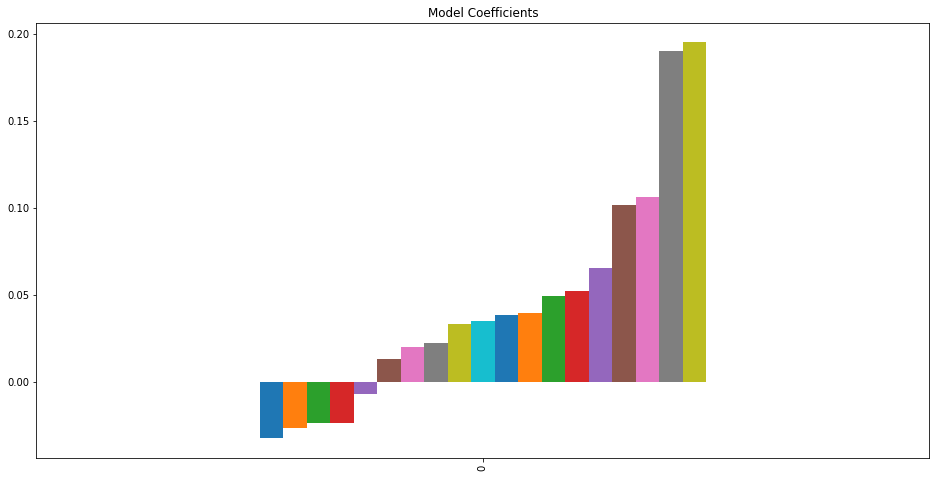

In [39]:
coef = pd.DataFrame(data=lreg.coef_ ).T
coef.columns = feature_columns

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Model Coefficients', legend=False, figsize=(16,8),);

In [40]:
coef.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_lot15', 'yr_old', 'since_sold', 'sqft_living_log',
       'sqft_above_log', 'sqft_living15_log'],
      dtype='object')

#### Lasso with different alpha levels:

In [41]:
## training the model
lasso001 = Lasso(alpha=0.01, normalize=False)

lasso001.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

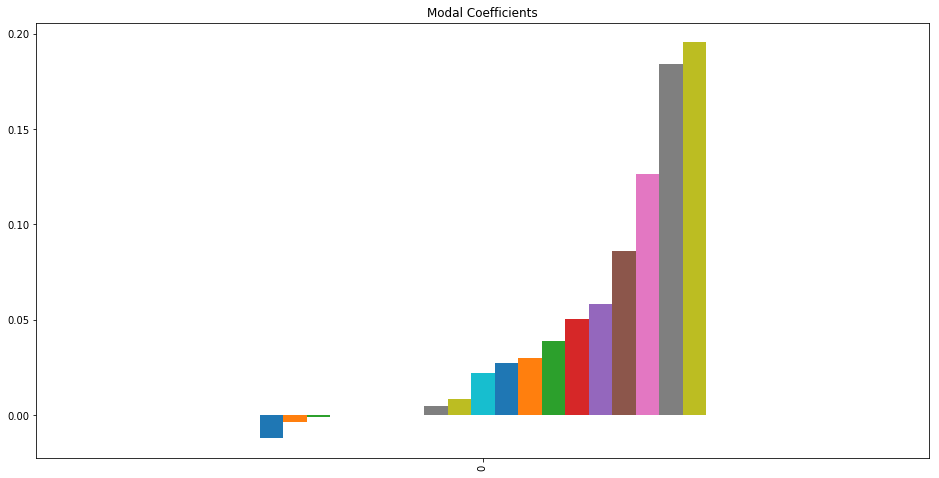

In [42]:
lasso_coef001 = pd.DataFrame(data=lasso001.coef_).T
lasso_coef001.columns = X_train.columns
lasso_coef001 = lasso_coef001.T.sort_values(by=0).T
lasso_coef001.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8));

In [43]:
lasso_coef001.T[lasso_coef001.T[0] > 0]

,0
sqft_lot,0.004599
yr_renovated,0.008204
floors,0.022073
waterfront,0.027419
condition,0.030194
bathrooms,0.038725
view,0.050496
sqft_living15_log,0.058054
yr_old,0.086224
sqft_living_log,0.126695


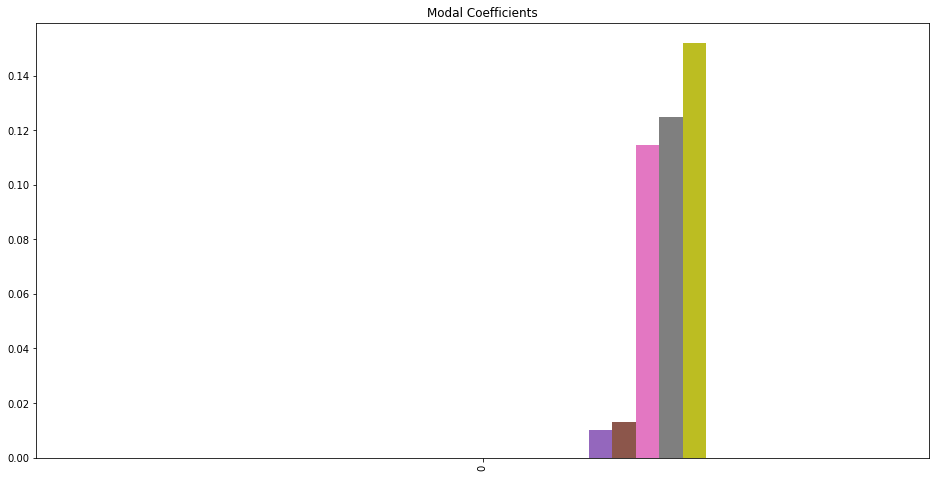

In [44]:
## training the model
lasso01 = Lasso(alpha=0.1, normalize=False)

lasso01.fit(X_train,y_train)

lasso_coef01 = pd.DataFrame(data=lasso01.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8));

In [45]:
lasso_coef01.T[lasso_coef01.T[0] > 0]

,0
view,0.009970
sqft_living15_log,0.012970
lat,0.114639
sqft_living_log,0.124716
grade,0.151854


### Wrapper Methods

Wrapper methods determine the optimal subset of features using different combinations of features to train models and then calculating performance. A predictive model is used to evaluate a combination of features and assign a score based on model accuracy. Every subset is used to train models and then evaluated on a test set. 

The search process may be methodical such as a best-first search, it may stochastic such as a random hill-climbing algorithm, or it may use heuristics, like forward and backward passes to add and remove features.

One of the main drawbacks of wrapper methods is the sheer amount of models that needs to be trained. It can be very computationally expensive and is infeasible with large number of features. However they are highly effective in determining the optimal subset. 

![alt text](./resources/new_wrapper.png)

#### Recursive Feature Elimination

An example of a wrapper method is the recursive feature elimination algorithm.

As the name suggests, this method eliminates worst performing features on a particular model one after the other until the best subset of features are known.


Recursive elimination eliminates the least explaining features one after the other.
For data with *n* features,

- On the first round, *n-1* models are created with combination of all features except one. The least performing feature is removed

- On the second round, *n-2* models are created by removing another feature.



<img src='./resources/rfe_graph.png' width=500/>

In [46]:
ols = LinearRegression(n_jobs=-1)

In [47]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)

In [48]:
X_train_poly = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names(X_train.columns))
X_test_poly = pd.DataFrame(poly.transform(X_test), columns=poly.get_feature_names(X_train.columns))

X_train_poly.shape[1]

190

In [49]:
# Create recursive feature eliminator that scores features by mean squared errors
rec_feat_selector = RFECV(estimator=ols, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
rec_feat_selector.fit(X_train_poly, y_train)

RFECV(cv=10,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False),
   min_features_to_select=1, n_jobs=-1, scoring='neg_mean_squared_error',
   step=1, verbose=0)

In [50]:
selected_columns = X_train_poly.columns[rec_feat_selector.support_]
removed_columns = X_train_poly.columns[~rec_feat_selector.support_]

In [51]:
len(removed_columns)

84

In [52]:
len(selected_columns)

106

### EDA & Filter Methods

Sometimes we can use basic EDA to help with feature selection. As we mentioned before, one example is that there is no causal connection between street number and housing price. So we wouldn't want to use street number as a feature. 

Other examples of where EDA could help us drop features would be the percentage of NaN values in a column or a column that is a useless personal identifier. A customer's eye color would not be an informative feature for software sales data.

Filter feature selection methods apply a statistical measure to assign a scoring metric to each feature. The features are ranked by the score and either selected to be kept or removed from the dataset. The benefit of filter methods is that they can provide us with some useful visualizations for helping us gain an understanding about characteristics of our data. 

![alt text](./resources/new_filter.png)

**Examples:** 
* F-Test
* Chi squared test 
* Information gain 
* Correlation coefficient scores

![alt text](./resources/FS1.webp)

####  Removing variables based on F-Test results:

An F-test is any statistical test in which the test statistic has an F-distribution under the null hypothesis. It is most often used when comparing statistical models that have been fitted to a data set, in order to identify the model that best fits the population from which the data were sampled. F-tests are named after its test statistic, F, which was named in honor of Sir Ronald Fisher. The F-statistic is simply a ratio of two variances. Variances are a measure of dispersion, or how far the data are scattered from the mean. 

Given that F-tests evaluate the ratio of two variances, you might think it’s only suitable for determining whether the variances are equal. Actually, it can do that and a lot more! F-tests are surprisingly flexible because you can include different variances in the ratio to test a wide variety of properties. F-tests can compare the fits of different models, test the overall significance in regression models, test specific terms in linear models, and determine whether a set of means are all equal. 

- The F-Test is useful in feature selection as we get to know the significance of each feature in improving the model.

- Sklearn provides the `SelectKBest()` features using F-Test.

**Using the F-test to select the 10 top variables for this model**

In [53]:
selector = SelectKBest(f_regression, k=10)

selector.fit(X_train, y_train)

SelectKBest(k=10, score_func=<function f_regression at 0x1a130ce048>)

In [54]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [55]:
list(removed_columns)

['sqft_lot',
 'waterfront',
 'condition',
 'yr_renovated',
 'zipcode',
 'long',
 'sqft_lot15',
 'yr_old',
 'since_sold']

In [56]:
list(selected_columns)

['bedrooms',
 'bathrooms',
 'floors',
 'view',
 'grade',
 'sqft_basement',
 'lat',
 'sqft_living_log',
 'sqft_above_log',
 'sqft_living15_log']

#### Removing Variables based on correlation coefficient

In [57]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_renovated,zipcode,lat,long,sqft_lot15,yr_old,since_sold,sqft_living_log,sqft_above_log,sqft_living15_log
bedrooms,NaN,0.53002,0.036030,0.183029,0.010245,0.085818,0.023423,0.365484,0.309162,0.017572,0.153681,0.011145,0.131030,0.033370,0.161205,0.011949,0.634988,0.526480,0.412305
bathrooms,NaN,NaN,0.089223,0.507841,0.052506,0.186547,0.126874,0.662341,0.273413,0.046164,0.198083,0.026146,0.219976,0.092670,0.508137,0.028800,0.760225,0.696238,0.565961
sqft_lot,NaN,NaN,NaN,0.001608,0.023191,0.073394,0.009503,0.114325,0.022296,0.007013,0.123756,0.077648,0.222215,0.718256,0.051398,0.004591,0.151138,0.162148,0.146501
floors,NaN,NaN,NaN,NaN,0.025368,0.028801,0.269161,0.461378,0.241826,0.000234,0.058898,0.051623,0.125801,0.005808,0.493261,0.024343,0.371951,0.550515,0.276277
waterfront,NaN,NaN,NaN,NaN,NaN,0.400990,0.022451,0.077167,0.070714,0.087047,0.032633,0.015082,0.046341,0.030899,0.030767,0.003295,0.073730,0.057309,0.074862
view,NaN,NaN,NaN,NaN,NaN,NaN,0.047482,0.249859,0.282606,0.099837,0.086528,0.006943,0.077316,0.071374,0.052113,0.001844,0.249425,0.157587,0.263388
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.144915,0.171538,0.059033,0.001544,0.019381,0.107274,0.004074,0.363367,0.042050,0.051606,0.151775,0.092541
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.167138,0.010819,0.178703,0.115709,0.195274,0.120686,0.444334,0.032301,0.743904,0.742465,0.684236
sqft_basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072481,0.073562,0.110795,0.143144,0.021257,0.133122,0.012089,0.421011,0.054639,0.206216
yr_renovated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067963,0.034984,0.071242,0.010293,0.227694,0.022770,0.050159,0.022682,0.006692


In [58]:
import seaborn as sns

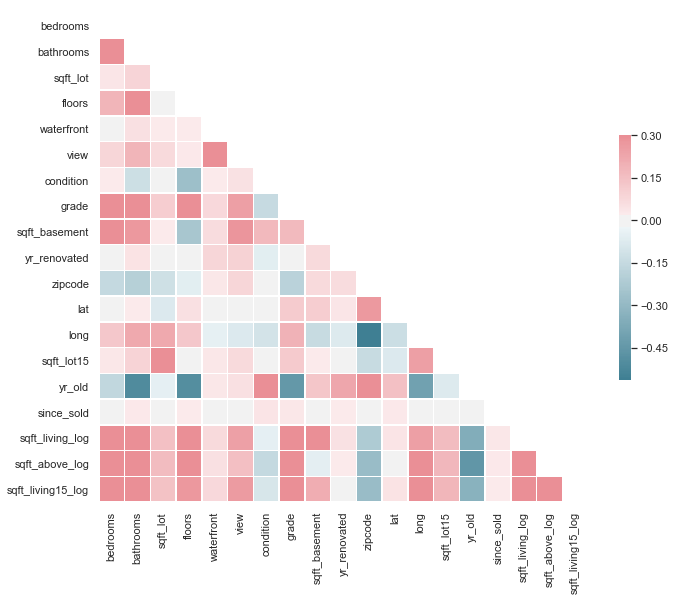

In [59]:
sns.set(style="white")

# Compute the correlation matrix
corr_matrix = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [60]:
len(X_train.columns)

19

In [61]:
# Find index of feature columns with correlation greater than threshold
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop

[]

In [62]:
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)

In [63]:
len(X_train.columns)

19

# Summary:

Great work! After reviewing over/underfitting and the bias variance trade-off, we talked about regularization. Specifically, you learned how regularization addresses the overfitting problem with it's cost function, the differences between regularization methods and when it is appropriate to use them, some of the factors to consider when selecting which features to include, and how to apply these concepts on models through your code.